# Importación de las librerías necesarias para la ejecución #

In [1]:
#Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score, cross_validate

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from scipy.stats import f_oneway
from scipy.stats import kendalltau, spearmanr
from scipy.stats import pointbiserialr

# Lectura de los datos de los partidos ya formateados en .csv

In [2]:
import os

dataframe_equipos = pd.read_csv("teams.csv")


dataframes_details = []
carpeta_details = "Details_Procesados/"  # Reemplaza "ruta/de/la/carpeta" con la ruta de la carpeta que deseas explorar

archivos = os.listdir(carpeta_details)
for archivo in archivos:
    df = pd.read_csv("Details_Procesados/"+archivo)
    df = df.iloc[::-1]
    dataframes_details.append(df)

details_partidos = pd.concat(dataframes_details, ignore_index=True)

dataframes = []
carpeta = "Datos_Formateados/"  # Reemplaza "ruta/de/la/carpeta" con la ruta de la carpeta que deseas explorar

archivos = os.listdir(carpeta)
for archivo in archivos:
    df = pd.read_csv("Datos_Formateados/"+archivo)
    df = df.iloc[::-1]
    dataframes.append(df)

datos_partidos = pd.concat(dataframes, ignore_index=True)

datos_partidos = datos_partidos.dropna()
datos_partidos.shape

C:\Users\User\AppData\Local\Temp\ipykernel_17476\1540173836.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Details_Procesados/"+archivo)


(25266, 22)

In [3]:
print(datos_partidos.shape)
datos_partidos = datos_partidos.dropna()
datos_partidos.shape

(25266, 22)


(25266, 22)

In [4]:
print(details_partidos.shape)
details_partidos = details_partidos.drop_duplicates()
details_partidos.shape

(638857, 41)


(638857, 41)

In [5]:
print(datos_partidos.shape)
datos_partidos = datos_partidos.drop_duplicates()
datos_partidos.shape

(25266, 22)


(25266, 22)

In [6]:
datos_partidos.head()

,Unnamed: 0,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,17903,2004-10-22,10400066,Final,1610612750,1610612752,2004,1610612750,102.0,0.523,...,32.0,46.0,1610612752,82.0,0.333,0.778,0.154,21.0,41.0,1
1,17902,2004-10-22,10400067,Final,1610612762,1610612758,2004,1610612762,103.0,0.507,...,25.0,43.0,1610612758,88.0,0.362,0.814,0.250,16.0,33.0,1
2,17901,2004-10-22,10400065,Final,1610612766,1610612757,2004,1610612766,69.0,0.377,...,24.0,36.0,1610612757,63.0,0.311,0.741,0.217,9.0,44.0,1
3,17900,2004-10-22,10400068,Final,1610612738,1610612751,2004,1610612738,83.0,0.431,...,14.0,34.0,1610612751,96.0,0.449,0.885,0.231,21.0,35.0,0
4,17899,2004-10-22,10400071,Final,1610612765,1610612764,2004,1610612765,100.0,0.549,...,24.0,34.0,1610612764,82.0,0.411,0.724,0.071,15.0,33.0,1


In [7]:
details_partidos.fillna(0, inplace=True)
details_partidos.head()

,Unnamed: 0.1,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,...,FGM_Total,FG3M_Total,AST_Total,REB_Total,STL_Total,Mejor_FGM,Mejor_FG3M,Mejor_AST,Mejor_STL,Mejor_REB
0,32600,243640,40400407,1610612759,SAS,San Antonio,2757,Beno Udrih,0,0,...,205.0,69.0,174.0,104.0,50.0,0.0,0.0,0.0,0.0,0.0
1,32599,243639,40400407,1610612759,SAS,San Antonio,299,Glenn Robinson,0,0,...,51.0,5.0,9.0,47.0,7.0,0.0,0.0,0.0,0.0,0.0
2,32598,243638,40400407,1610612759,SAS,San Antonio,1725,Rasho Nesterovic,0,0,...,208.0,0.0,78.0,498.0,33.0,0.0,0.0,0.0,0.0,0.0
3,32597,243637,40400407,1610612759,SAS,San Antonio,763,Tony Massenburg,0,0,...,88.0,0.0,15.0,184.0,20.0,0.0,0.0,0.0,0.0,0.0
4,32596,243636,40400407,1610612759,SAS,San Antonio,2484,Devin Brown,0,0,...,188.0,48.0,103.0,204.0,42.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def get_equipos(dataframe: pd.DataFrame) -> list:
    equipos = dataframe["HOME_TEAM_ID"].drop_duplicates()
    return equipos

def get_nombres_equipo(lista_ids: list, dataframe_equipos: pd.DataFrame) -> list:
    list = []
    for equipo in lista_ids:
        list.append(dataframe_equipos.loc[dataframe_equipos['TEAM_ID'] == equipo, 'NICKNAME'].values[0])
    return list

equipos_ids = get_equipos(dataframe=datos_partidos)
equipos_nombres = get_nombres_equipo(lista_ids=equipos_ids, dataframe_equipos=dataframe_equipos)
len(equipos_nombres)

30

# Predicción del ganador de un partido 

## - Pre-procesamiento de los datos ##

### Limpiado de valores diferentes a gana home o away

In [9]:
condicion = (datos_partidos['HOME_TEAM_WINS'] != 1) & (datos_partidos['HOME_TEAM_WINS'] != 0)
datos_partidos = datos_partidos.drop(datos_partidos[condicion].index)

In [10]:
'''
def insertar_mejores_en_details(dataframe: pd.DataFrame, year:int):
    games_details = pd.read_csv("Details/"+str(year)+"-details.csv")
    dataframes_details = []
    mejores_anotadores_de_2 = ['','','','','']
    tiros_de_2_encestados_por_los_mejores = [0,0,0,0,0]
    mejores_anotadores_de_3 = ['','','','','']
    tiros_de_3_encestados_por_los_mejores = [0,0,0,0,0]
    mejores_asistidores = ['','','','','']
    asistencias_por_los_mejores = [0,0,0,0,0]
    mejores_stealers = ['','','','','']
    steals_por_los_mejores = [0,0,0,0,0]
    mejores_reboteadores = ['','','','','']
    rebotes_por_los_mejores = [0,0,0,0,0]
    for idx, partido in dataframe.iterrows():
        details_partido = games_details[games_details['GAME_ID'] == partido['GAME_ID']]
        for jugador in mejores_anotadores_de_2:
            details_partido.loc[details_partido['PLAYER_ID'] == jugador, 'Mejor_FGM'] = 1
        for jugador in mejores_anotadores_de_3:
            details_partido.loc[details_partido['PLAYER_ID'] == jugador, 'Mejor_FG3M'] = 1
        for jugador in mejores_asistidores:
            details_partido.loc[details_partido['PLAYER_ID'] == jugador, 'Mejor_AST'] = 1
        for jugador in mejores_stealers:
            details_partido.loc[details_partido['PLAYER_ID'] == jugador, 'Mejor_STL'] = 1
        for jugador in mejores_reboteadores:
            details_partido.loc[details_partido['PLAYER_ID'] == jugador, 'Mejor_REB'] = 1
            
        top_5_fgm = details_partido.sort_values(by='FGM_Total', ascending=False).head(5)
        fgm_top_5 = top_5_fgm['FGM_Total'].tolist()
        fgm_top_5_names = top_5_fgm['PLAYER_ID'].to_list()
        for i in range(len(tiros_de_2_encestados_por_los_mejores)):
            if fgm_top_5_names[i] not in mejores_anotadores_de_2:
                if fgm_top_5[i] > tiros_de_2_encestados_por_los_mejores[i]:
                    tiros_de_2_encestados_por_los_mejores.insert(i,fgm_top_5[i])
                    mejores_anotadores_de_2.insert(i,fgm_top_5_names[i])
                    mejores_anotadores_de_2.pop(-1)
                    tiros_de_2_encestados_por_los_mejores.pop(-1)
                    
        top_5_fg3m = details_partido.sort_values(by='FG3M_Total', ascending=False).head(5)
        fg3m_top_5 = top_5_fg3m['FG3M_Total'].tolist()
        fg3m_top_5_names = top_5_fg3m['PLAYER_ID'].to_list()
        for i in range(len(tiros_de_3_encestados_por_los_mejores)):
            if fg3m_top_5_names[i] not in mejores_anotadores_de_3:
                if fg3m_top_5[i] > tiros_de_3_encestados_por_los_mejores[i]:
                    tiros_de_3_encestados_por_los_mejores.insert(i,fg3m_top_5[i])
                    mejores_anotadores_de_3.insert(i,fg3m_top_5_names[i])
                    mejores_anotadores_de_3.pop(-1)
                    tiros_de_3_encestados_por_los_mejores.pop(-1)
                    
        top_5_ast = details_partido.sort_values(by='AST_Total', ascending=False).head(5)
        ast_top_5 = top_5_ast['AST_Total'].tolist()
        ast_top_5_names = top_5_ast['PLAYER_ID'].to_list()
        for i in range(len(asistencias_por_los_mejores)):
            if ast_top_5_names[i] not in mejores_asistidores:
                if ast_top_5[i] > asistencias_por_los_mejores[i]:
                    asistencias_por_los_mejores.insert(i,ast_top_5[i])
                    mejores_asistidores.insert(i,ast_top_5_names[i])
                    mejores_asistidores.pop(-1)
                    asistencias_por_los_mejores.pop(-1)
                    
        top_5_reb = details_partido.sort_values(by='REB_Total', ascending=False).head(5)
        reb_top_5 = top_5_reb['REB_Total'].tolist()
        reb_top_5_names = top_5_reb['PLAYER_ID'].to_list()
        for i in range(len(rebotes_por_los_mejores)):
            if reb_top_5_names[i] not in mejores_reboteadores:
                if reb_top_5[i] > rebotes_por_los_mejores[i]:
                    rebotes_por_los_mejores.insert(i,reb_top_5[i])
                    mejores_reboteadores.insert(i,reb_top_5_names[i])
                    mejores_reboteadores.pop(-1)
                    rebotes_por_los_mejores.pop(-1)
                    
        top_5_stl = details_partido.sort_values(by='STL_Total', ascending=False).head(5)
        stl_top_5 = top_5_stl['STL_Total'].tolist()
        stl_top_5_names = top_5_stl['PLAYER_ID'].to_list()
        for i in range(len(steals_por_los_mejores)):
            if stl_top_5_names[i] not in mejores_stealers:
                if stl_top_5[i] > steals_por_los_mejores[i]:
                    steals_por_los_mejores.insert(i,stl_top_5[i])
                    mejores_stealers.insert(i,stl_top_5_names[i])
                    mejores_stealers.pop(-1)
                    steals_por_los_mejores.pop(-1)
                    
        dataframes_details.append(details_partido)
        
    dataframe_details_devuelto = pd.concat(dataframes_details, ignore_index=True)
    return dataframe_details_devuelto


year = 2018                
for idx,temporada in enumerate(dataframes):
    details_devuelto = insertar_mejores_en_details(dataframe=temporada, year=year)
    details_devuelto.to_csv("Details_Tochos/"+str(year)+"-details_tochos.csv")
    year += 1
'''

'\ndef insertar_mejores_en_details(dataframe: pd.DataFrame, year:int):\n    games_details = pd.read_csv("Details/"+str(year)+"-details.csv")\n    dataframes_details = []\n    mejores_anotadores_de_2 = [\'\',\'\',\'\',\'\',\'\']\n    tiros_de_2_encestados_por_los_mejores = [0,0,0,0,0]\n    mejores_anotadores_de_3 = [\'\',\'\',\'\',\'\',\'\']\n    tiros_de_3_encestados_por_los_mejores = [0,0,0,0,0]\n    mejores_asistidores = [\'\',\'\',\'\',\'\',\'\']\n    asistencias_por_los_mejores = [0,0,0,0,0]\n    mejores_stealers = [\'\',\'\',\'\',\'\',\'\']\n    steals_por_los_mejores = [0,0,0,0,0]\n    mejores_reboteadores = [\'\',\'\',\'\',\'\',\'\']\n    rebotes_por_los_mejores = [0,0,0,0,0]\n    for idx, partido in dataframe.iterrows():\n        details_partido = games_details[games_details[\'GAME_ID\'] == partido[\'GAME_ID\']]\n        for jugador in mejores_anotadores_de_2:\n            details_partido.loc[details_partido[\'PLAYER_ID\'] == jugador, \'Mejor_FGM\'] = 1\n        for jugador in 

### Feature engineering

In [11]:
def get_partidos_jugados_por_equipo(dataframe: pd.DataFrame, equipo: str) -> int:
    partidos_jugados_local = len(dataframe.loc[dataframe['HOME_TEAM_ID'] == equipo])
    partidos_jugados_visitante = len(dataframe.loc[dataframe['VISITOR_TEAM_ID'] == equipo])
    return partidos_jugados_local + partidos_jugados_visitante

def get_puntos_encestados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = []
    partidos_del_equipo = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) | (dataframe['VISITOR_TEAM_ID'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HOME_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_home'])
        if partido['VISITOR_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_away'])
    return lista_puntos_por_partido

def get_puntos_recibidos_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = []
    partidos_del_equipo = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) | (dataframe['VISITOR_TEAM_ID'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HOME_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_away'])
        if partido['VISITOR_TEAM_ID'] == equipo:
            lista_puntos_por_partido.append(partido['PTS_home'])
    return lista_puntos_por_partido

def get_media_puntos_encestados_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = get_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    #lista_puntos_por_partido = lista_puntos_por_partido[::-1]
    lista_media_puntos_por_partido = []
    puntos_acumulados = 0
    for idx, valor in enumerate(lista_puntos_por_partido):
        lista_media_puntos_por_partido.append((valor + puntos_acumulados) / (idx+1))
        puntos_acumulados += valor
    return lista_media_puntos_por_partido

def get_media_puntos_recibidos_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_por_partido = get_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_puntos_por_partido = []
    puntos_acumulados = 0
    for idx, valor in enumerate(lista_puntos_por_partido):
        lista_media_puntos_por_partido.append((valor + puntos_acumulados) / (idx+1))
        puntos_acumulados += valor
    return lista_media_puntos_por_partido

def get_basket_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_puntos_encestados_por_partido = get_media_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_puntos_recibidos_por_partido = get_media_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_basket_average_por_partido = []
    for idx, valor in enumerate(lista_puntos_encestados_por_partido):
        lista_basket_average_por_partido.append(valor - lista_puntos_recibidos_por_partido[idx])
    return lista_basket_average_por_partido

def get_media_basket_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_media_puntos_encestados_por_partido = get_media_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_puntos_recibidos_por_partido = get_media_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_basket_average_por_partido = []
    for idx, valor in enumerate(lista_media_puntos_encestados_por_partido):
        lista_media_basket_average_por_partido.append((valor - lista_media_puntos_recibidos_por_partido[idx]))
    return lista_media_basket_average_por_partido

def obtencion_basket_average_dataframe(dataframe: pd.DataFrame, guardar: bool) -> list:
    lista_listas_basket_average_medio_cada_equipo = []
    equipos = get_equipos(dataframe=dataframe)
    for equipo in equipos:
        lista_basket_average_medio_un_equipo = get_media_basket_average_por_partido(dataframe=dataframe, equipo=equipo)
        lista_basket_average_medio_un_equipo.insert(0,0)
        if guardar:
            dict_ultimo_basket_average_equipo[equipo] = lista_basket_average_medio_un_equipo[-1]
        lista_basket_average_medio_un_equipo.pop()
        lista_listas_basket_average_medio_cada_equipo.append(lista_basket_average_medio_un_equipo)
    return lista_listas_basket_average_medio_cada_equipo
        
def get_diferencia_media_basket_average_por_partido(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_media_basket_average_por_partido = get_media_basket_average_por_partido(dataframe=dataframe, equipo=equipo)
    lista_diferencias = []
    valor_anterior = 0
    for valor in lista_media_basket_average_por_partido:
        lista_diferencias.append(valor - valor_anterior)
        valor_anterior = valor
    return lista_diferencias

def obtencion_diferencias_average_dataframe(dataframe: pd.DataFrame, guardar: bool) -> list:
    lista_listas_diferencias_basket_average_medio_cada_equipo = []
    equipos = get_equipos(dataframe=dataframe)
    for equipo in equipos:
        lista_diferencias_basket_average_medio_un_equipo = get_diferencia_media_basket_average_por_partido(dataframe=dataframe, equipo=equipo)
        lista_diferencias_basket_average_medio_un_equipo.insert(0,0)
        if guardar:
            dict_ultimas_diferencias_cada_equipo[equipo] = lista_diferencias_basket_average_medio_un_equipo[-1]
        lista_diferencias_basket_average_medio_un_equipo.pop()
        lista_listas_diferencias_basket_average_medio_cada_equipo.append(lista_diferencias_basket_average_medio_un_equipo)
    return lista_listas_diferencias_basket_average_medio_cada_equipo

def get_resultados_partidos_equipo(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_resultados_equipo = []
    victorias = 0
    derrotas = 0
    partidos_del_equipo = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) | (dataframe['VISITOR_TEAM_ID'] == equipo)]
    for idx, partido in partidos_del_equipo.iterrows():
        if partido['HOME_TEAM_ID'] == equipo and partido['HOME_TEAM_WINS'] == 1:
            victorias += 1
        elif partido['VISITOR_TEAM_ID'] == equipo and partido['HOME_TEAM_WINS'] == 0:
            victorias += 1
        else:
            derrotas += 1
        lista_resultados_equipo.append((victorias,derrotas))
    return lista_resultados_equipo

def get_winning_porcentage(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_resultados = get_resultados_partidos_equipo(dataframe=dataframe, equipo=equipo)
    lista_porcentages = []
    for tupla in lista_resultados:
        lista_porcentages.append(tupla[0] / (tupla[0]+tupla[1]))
    return lista_porcentages

def obtencion_porcentage_victorias(dataframe: pd.DataFrame, guardar: bool) -> list:
    lista_listas_resultados_en_liga = []
    equipos = get_equipos(dataframe=dataframe)
    for equipo in equipos:
        lista_resultados_por_partido_un_equipo = get_winning_porcentage(dataframe=dataframe, equipo=equipo)
        lista_resultados_por_partido_un_equipo.insert(0,0)
        if guardar:
            dict_ultimos_porcentages_cada_equipo[equipo] = lista_resultados_por_partido_un_equipo[-1]
        lista_resultados_por_partido_un_equipo.pop()
        lista_listas_resultados_en_liga.append(lista_resultados_por_partido_un_equipo)
    return lista_listas_resultados_en_liga

def get_mejores_jugadores(dataframe: pd.DataFrame):
    for idx, partido in dataframe.iterrows():
        detalles_del_partido = details_partidos[details_partidos['GAME_ID'] == partido['GAME_ID']]
        detalles_home_team = detalles_del_partido[detalles_del_partido['TEAM_ID'] == partido['HOME_TEAM_ID']]
        detalles_away_team = detalles_del_partido[detalles_del_partido['TEAM_ID'] == partido['VISITOR_TEAM_ID']]
        mejores_anotadores_de_2_home = detalles_home_team['Mejor_FGM'].sum()
        mejores_anotadores_de_3_home = detalles_home_team['Mejor_FG3M'].sum()
        mejores_asistidores_home = detalles_home_team['Mejor_AST'].sum()
        mejores_rebotadores_home = detalles_home_team['Mejor_REB'].sum()
        mejores_stealers_home = detalles_home_team['Mejor_STL'].sum()
        dataframe.at[idx, 'Mejores_FGM_Home'] = mejores_anotadores_de_2_home
        dataframe.at[idx, 'Mejores_FG3M_Home'] = mejores_anotadores_de_3_home
        dataframe.at[idx, 'Mejores_AST_Home'] = mejores_asistidores_home
        dataframe.at[idx, 'Mejores_REB_Home'] = mejores_rebotadores_home
        dataframe.at[idx, 'Mejores_STL_Home'] = mejores_stealers_home
        mejores_anotadores_de_2_away = detalles_away_team['Mejor_FGM'].sum()
        mejores_anotadores_de_3_away = detalles_away_team['Mejor_FG3M'].sum()
        mejores_asistidores_away = detalles_away_team['Mejor_AST'].sum()
        mejores_rebotadores_away = detalles_away_team['Mejor_REB'].sum()
        mejores_stealers_away = detalles_away_team['Mejor_STL'].sum()
        dataframe.at[idx, 'Mejores_FGM_Away'] = mejores_anotadores_de_2_away
        dataframe.at[idx, 'Mejores_FG3M_Away'] = mejores_anotadores_de_3_away
        dataframe.at[idx, 'Mejores_AST_Away'] = mejores_asistidores_away
        dataframe.at[idx, 'Mejores_REB_Away'] = mejores_rebotadores_away
        dataframe.at[idx, 'Mejores_STL_Away'] = mejores_stealers_away
        
    return dataframe

def obtencion_resultados_en_liga(dataframe: pd.DataFrame, guardar: bool) -> list:
    lista_listas_resultados_en_liga = []
    equipos = get_equipos(dataframe=dataframe)
    for equipo in equipos:
        lista_resultados_por_partido_un_equipo = get_resultados_partidos_equipo(dataframe=dataframe, equipo=equipo)
        lista_resultados_por_partido_un_equipo.insert(0,(0,0))
        if guardar:
            dict_ultimos_resultados_cada_equipo[equipo] = lista_resultados_por_partido_un_equipo[-1]
        lista_resultados_por_partido_un_equipo.pop()
        lista_listas_resultados_en_liga.append(lista_resultados_por_partido_un_equipo)
    return lista_listas_resultados_en_liga
    
def obtencion_media_puntos_encestados(dataframe: pd.DataFrame, guardar:bool) -> list:
    lista_listas_puntos_marcados = []
    equipos = get_equipos(dataframe=dataframe)
    for equipo in equipos:
        lista_puntos_por_partido_un_equipo = get_media_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
        lista_puntos_por_partido_un_equipo.insert(0,0)
        if guardar:
            dict_ultimos_puntos_marcados_cada_equipo[equipo] = lista_puntos_por_partido_un_equipo[-1]
        lista_puntos_por_partido_un_equipo.pop()
        lista_listas_puntos_marcados.append(lista_puntos_por_partido_un_equipo)
    return lista_listas_puntos_marcados

def media_ultimos_5_partidos(favor: list, contra: list, idx: int):
    return ((favor[idx]-contra[idx])+(favor[idx-1]-contra[idx-1])+(favor[idx-2]-contra[idx-2])+(favor[idx-3]-contra[idx-3])+(favor[idx-4]-contra[idx-4])) /5

def get_media_gol_average_por_partido_ultimos_5(dataframe: pd.DataFrame, equipo: str) -> list:
    lista_goles_marcados_por_partido = get_puntos_encestados_por_partido(dataframe=dataframe, equipo=equipo)
    lista_goles_encajados_por_partido = get_puntos_recibidos_por_partido(dataframe=dataframe, equipo=equipo)
    lista_media_gol_average_por_partido = []
    valor_acumulado = 0
    for idx, valor in enumerate(lista_goles_marcados_por_partido):
        if idx <= 4:
            lista_media_gol_average_por_partido.append((valor - lista_goles_encajados_por_partido[idx] + valor_acumulado) / (idx+1))
            valor_acumulado += (valor - lista_goles_encajados_por_partido[idx])
        else:
            lista_media_gol_average_por_partido.append(media_ultimos_5_partidos(favor=lista_goles_marcados_por_partido, contra=lista_goles_encajados_por_partido, idx=idx))

    return lista_media_gol_average_por_partido

def obtencion_gol_average_ultimos_5_dataframe(dataframe: pd.DataFrame, guardar: bool) -> list:
    lista_listas_gol_average_medio_cada_equipo = []
    equipos = get_equipos(dataframe=dataframe)
    for equipo in equipos:
        lista_gol_average_medio_un_equipo = get_media_gol_average_por_partido_ultimos_5(dataframe=dataframe, equipo=equipo)
        lista_gol_average_medio_un_equipo.insert(0,0)
        if guardar:
            dict_ultimo_basket_average_ultimos_5_equipo[equipo] = lista_gol_average_medio_un_equipo[-1]
        lista_gol_average_medio_un_equipo.pop()
        lista_listas_gol_average_medio_cada_equipo.append(lista_gol_average_medio_un_equipo)
    return lista_listas_gol_average_medio_cada_equipo
    
def insercion_datos_cada_dataframe(dataframe: pd.DataFrame, lista_listas_basket_average_medio_cada_equipo: list, lista_listas_diferencias_basket_average_medio_cada_equipo: list, 
lista_listas_puntos_por_partido: list, lista_listas_puntos_marcados_por_partido: list,
lista_listas_resultados_por_partido: list, lista_listas_gol_average_ultimos_5_por_partido: list):
    equipos = get_equipos(dataframe=dataframe)
    for idx_equipos,equipo in enumerate(equipos):
        partidos_del_equipo = dataframe.loc[(dataframe['HOME_TEAM_ID'] == equipo) | (dataframe['VISITOR_TEAM_ID'] == equipo)]
        idx_partidos = 0
        for idx, partido in partidos_del_equipo.iterrows():
            if partido['HOME_TEAM_ID'] == equipo:
                dataframe.at[idx,'Basket_Average_Home'] = lista_listas_basket_average_medio_cada_equipo[idx_equipos][idx_partidos]
                dataframe.at[idx,'Dif_Home'] = lista_listas_diferencias_basket_average_medio_cada_equipo[idx_equipos][idx_partidos]
                dataframe.at[idx,'Porcentage_Home'] = lista_listas_puntos_por_partido[idx_equipos][idx_partidos]
                dataframe.at[idx,'Puntos_Encestados_Home'] = lista_listas_puntos_marcados_por_partido[idx_equipos][idx_partidos]
                dataframe.at[idx,'Victorias_Home'] = lista_listas_resultados_por_partido[idx_equipos][idx_partidos][0]
                dataframe.at[idx,'Derrotas_Home'] = lista_listas_resultados_por_partido[idx_equipos][idx_partidos][1]
                dataframe.at[idx,'Basket_Average_Ultimos_5_Home'] = lista_listas_gol_average_ultimos_5_por_partido[idx_equipos][idx_partidos]
            if partido['VISITOR_TEAM_ID'] == equipo:
                dataframe.at[idx,'Basket_Average_Away'] = lista_listas_basket_average_medio_cada_equipo[idx_equipos][idx_partidos]
                dataframe.at[idx,'Dif_Away'] = lista_listas_diferencias_basket_average_medio_cada_equipo[idx_equipos][idx_partidos]
                dataframe.at[idx,'Porcentage_Away'] = lista_listas_puntos_por_partido[idx_equipos][idx_partidos]
                dataframe.at[idx,'Puntos_Encestados_Away'] = lista_listas_puntos_marcados_por_partido[idx_equipos][idx_partidos]
                dataframe.at[idx,'Victorias_Away'] = lista_listas_resultados_por_partido[idx_equipos][idx_partidos][0]
                dataframe.at[idx,'Derrotas_Away'] = lista_listas_resultados_por_partido[idx_equipos][idx_partidos][1]
                dataframe.at[idx,'Basket_Average_Ultimos_5_Away'] = lista_listas_gol_average_ultimos_5_por_partido[idx_equipos][idx_partidos]
            idx_partidos += 1
    return dataframe    
    
dict_ultimas_diferencias_cada_equipo = {}    
dict_ultimo_basket_average_equipo = {}
dict_ultimos_porcentages_cada_equipo = {}
dict_ultimos_puntos_marcados_cada_equipo = {}
dict_ultimos_resultados_cada_equipo = {}
dict_ultimo_basket_average_ultimos_5_equipo = {}
guardar=False
for idx,temporada in enumerate(dataframes):
    if idx == (len(dataframes) - 1):
        guardar = True
    temporada = get_mejores_jugadores(dataframe=temporada)
    lista_listas_basket_average_medio_cada_equipo = obtencion_basket_average_dataframe(dataframe=temporada, guardar=guardar)
    lista_listas_diferencias_basket_average_medio_cada_equipo = obtencion_diferencias_average_dataframe(dataframe=temporada, guardar=guardar)
    lista_listas_puntos_por_partido = obtencion_porcentage_victorias(dataframe=temporada, guardar=guardar)
    lista_listas_puntos_marcados_por_partido = obtencion_media_puntos_encestados(dataframe=temporada, guardar=guardar)
    lista_listas_resultados_por_partido = obtencion_resultados_en_liga(dataframe=temporada, guardar=guardar)
    lista_listas_gol_average_ultimos_5_por_partido = obtencion_gol_average_ultimos_5_dataframe(dataframe=temporada, guardar=guardar)

    dataframe_con_datos_temporada = insercion_datos_cada_dataframe(dataframe=temporada, lista_listas_basket_average_medio_cada_equipo=lista_listas_basket_average_medio_cada_equipo,
                lista_listas_diferencias_basket_average_medio_cada_equipo=lista_listas_diferencias_basket_average_medio_cada_equipo,
                lista_listas_puntos_por_partido=lista_listas_puntos_por_partido,
                lista_listas_puntos_marcados_por_partido=lista_listas_puntos_marcados_por_partido,
                lista_listas_resultados_por_partido=lista_listas_resultados_por_partido,
                lista_listas_gol_average_ultimos_5_por_partido = lista_listas_gol_average_ultimos_5_por_partido)
    dataframes[idx] = dataframe_con_datos_temporada
    
datos_partidos = pd.concat(dataframes)

### Asignación de etiquetas numéricas a los posibles valores de HomeTeam y AwayTeam

In [12]:
label_encoder = LabelEncoder()
datos_partidos['labeled Home'] = label_encoder.fit_transform(datos_partidos['HOME_TEAM_ID'])
datos_partidos['labeled Away'] = label_encoder.fit_transform(datos_partidos['VISITOR_TEAM_ID'])

In [13]:
datos_partidos['HOME_TEAM_WINS'].value_counts()

HOME_TEAM_WINS
1    14845
0    10421
Name: count, dtype: int64

In [14]:
datos_locales = datos_partidos.loc[datos_partidos['HOME_TEAM_WINS'] == 1]  # Obtiene los índices de las primeras 100 filas que cumplen la condición
datos_visitantes = datos_partidos.loc[datos_partidos['HOME_TEAM_WINS'] == 0]  # Obtiene los índices de las primeras 100 filas que cumplen la condición

dataframes = [datos_visitantes.head(10000), datos_locales.head(10100)]
datos_partidos = pd.concat(dataframes)
datos_partidos = datos_partidos.drop_duplicates()
datos_partidos['HOME_TEAM_WINS'].value_counts()


HOME_TEAM_WINS
1    10100
0    10000
Name: count, dtype: int64

In [15]:
equipos_locales = datos_partidos['labeled Home']
equipos_visitantes = datos_partidos['labeled Away']
basket_average_home = datos_partidos['Basket_Average_Home']
basket_average_away = datos_partidos['Basket_Average_Away']
basket_averages = datos_partidos[['Basket_Average_Home','Basket_Average_Away']]
diferencia_home = datos_partidos['Dif_Home']
diferencia_away = datos_partidos['Dif_Away']
diferencias = datos_partidos[['Dif_Home','Dif_Away']]
puntos_encestados_home = datos_partidos['Puntos_Encestados_Home']
puntos_encestados_away = datos_partidos['Puntos_Encestados_Away']
mejores_jugadores_home = datos_partidos[['Mejores_FGM_Home','Mejores_FG3M_Home','Mejores_AST_Home','Mejores_REB_Home','Mejores_STL_Home']]
mejores_jugadores_away = datos_partidos[['Mejores_FGM_Away','Mejores_FG3M_Away','Mejores_AST_Away','Mejores_REB_Away','Mejores_STL_Away']]
puntos_encestados = datos_partidos[['Puntos_Encestados_Home','Puntos_Encestados_Away']]
victorias = datos_partidos[['Victorias_Home','Victorias_Away']]
derrotas = datos_partidos[['Derrotas_Home','Derrotas_Away']]
columnas_features = ['Basket_Average_Home','Basket_Average_Away','Dif_Home','Dif_Away','Porcentage_Home','Porcentage_Away','Puntos_Encestados_Home','Puntos_Encestados_Away',
                     'Victorias_Home','Derrotas_Home','Victorias_Away','Derrotas_Away','Basket_Average_Ultimos_5_Home','Basket_Average_Ultimos_5_Away'] #NO ESTAN INCLUIDAS LAS ESTADISTICAS DE LOS MEJORES JUGADORES
features = datos_partidos[columnas_features]
target = datos_partidos['HOME_TEAM_WINS']

In [16]:
for column in datos_partidos.columns:
    if datos_partidos[column].dtype != 'object':  # Solo características continuas
        groups = [datos_partidos[datos_partidos['HOME_TEAM_WINS'] == value][column] for value in datos_partidos['HOME_TEAM_WINS'].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f'ANOVA para {column}: F-statistic={f_stat}, p-value={p_value}')

ANOVA para Unnamed: 0: F-statistic=0.02412960149914101, p-value=0.8765571623092598
ANOVA para GAME_ID: F-statistic=1.1103019290379925, p-value=0.292028992694953
ANOVA para HOME_TEAM_ID: F-statistic=17.8503359076558, p-value=2.400300659748524e-05
ANOVA para VISITOR_TEAM_ID: F-statistic=29.935300812626327, p-value=4.520396012212945e-08
ANOVA para SEASON: F-statistic=2229.7288235835877, p-value=0.0
ANOVA para TEAM_ID_home: F-statistic=17.8503359076558, p-value=2.400300659748524e-05
ANOVA para PTS_home: F-statistic=2318.860018549629, p-value=0.0
ANOVA para FG_PCT_home: F-statistic=4507.978131921167, p-value=0.0
ANOVA para FT_PCT_home: F-statistic=98.87406592976062, p-value=3.044964703270763e-23
ANOVA para FG3_PCT_home: F-statistic=1932.271656198787, p-value=0.0
ANOVA para AST_home: F-statistic=1350.1190771682661, p-value=4.0110791425302774e-286
ANOVA para REB_home: F-statistic=836.1572977353347, p-value=3.59155606093894e-180
ANOVA para TEAM_ID_away: F-statistic=29.935300812626327, p-value=

c:\Users\User\OneDrive\Escritorio\TFG\Cosas_TFG\.venv\lib\site-packages\scipy\stats\_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA para Mejores_AST_Away: F-statistic=32.660182821819795, p-value=1.1131659561174014e-08
ANOVA para Mejores_REB_Away: F-statistic=4.673666716320291, p-value=0.03064023298848395
ANOVA para Mejores_STL_Away: F-statistic=20.51498769493896, p-value=5.9506316891696415e-06
ANOVA para Basket_Average_Home: F-statistic=1069.9205710655115, p-value=1.098552453022887e-228
ANOVA para Dif_Home: F-statistic=1.6646893093632102, p-value=0.19698621430149935
ANOVA para Porcentage_Home: F-statistic=893.3021660150871, p-value=4.411332593157988e-192
ANOVA para Puntos_Encestados_Home: F-statistic=132.3025343841257, p-value=1.6009203124707904e-30
ANOVA para Victorias_Home: F-statistic=366.109450415833, p-value=6.896524876915091e-81
ANOVA para Derrotas_Home: F-statistic=188.3623600672822, p-value=1.1279870625142302e-42
ANOVA para Basket_Average_Ultimos_5_Home: F-statistic=751.966605467448, p-value=1.4599708911960388e-162
ANOVA para Basket_Average_Away: F-statistic=841.4641083499358, p-value=2.80398625435506

In [17]:
for column in datos_partidos.columns:
    if datos_partidos[column].dtype != 'object':  # Solo características continuas
        correlation, _ = pointbiserialr(datos_partidos[column], datos_partidos['HOME_TEAM_WINS'])
        print(f'Correlación de punto biserial para {column}: {correlation}')

Correlación de punto biserial para Unnamed: 0: 0.0010957169833015756
Correlación de punto biserial para GAME_ID: -0.007432452295325227
Correlación de punto biserial para HOME_TEAM_ID: -0.02978886790777302
Correlación de punto biserial para VISITOR_TEAM_ID: 0.03856489910004393
Correlación de punto biserial para SEASON: -0.3160121273744396
Correlación de punto biserial para TEAM_ID_home: -0.02978886790777302
Correlación de punto biserial para PTS_home: 0.3216250571241335
Correlación de punto biserial para FG_PCT_home: 0.42802642662918433
Correlación de punto biserial para FT_PCT_home: 0.06996794491709729
Correlación de punto biserial para FG3_PCT_home: 0.29615847523693617
Correlación de punto biserial para AST_home: 0.2508946674620344
Correlación de punto biserial para REB_home: 0.19985556728408413
Correlación de punto biserial para TEAM_ID_away: 0.03856489910004393
Correlación de punto biserial para PTS_away: -0.5226464636257193
Correlación de punto biserial para FG_PCT_away: -0.4547419

In [18]:
#target = to_categorical(target) solo usar si se quiere usar la red neuronal

## - Normalización de los datos

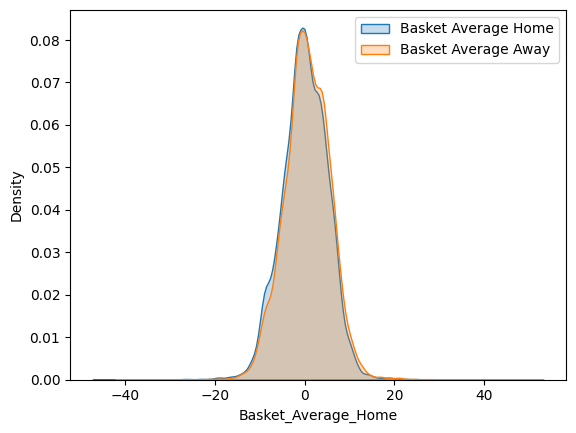

In [19]:
columnas = ['Basket Average Home','Basket Average Away']
for i, col in enumerate(basket_averages.columns):
    sns.kdeplot(basket_averages[col], fill=True, label=columnas[i])
plt.legend()
plt.show()

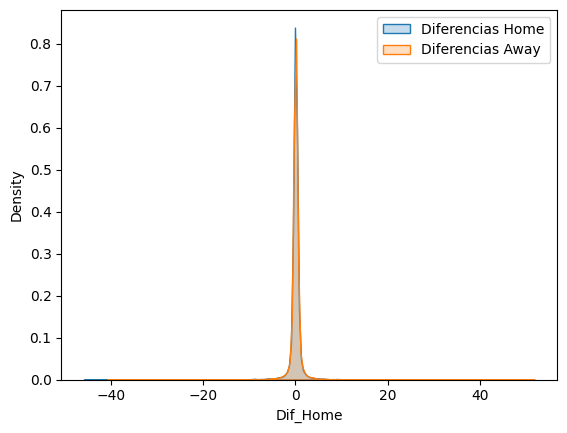

In [20]:
columnas = ['Diferencias Home','Diferencias Away']
for i, col in enumerate(diferencias.columns):
    sns.kdeplot(diferencias[col], fill=True, label=columnas[i])
plt.legend()
plt.show()

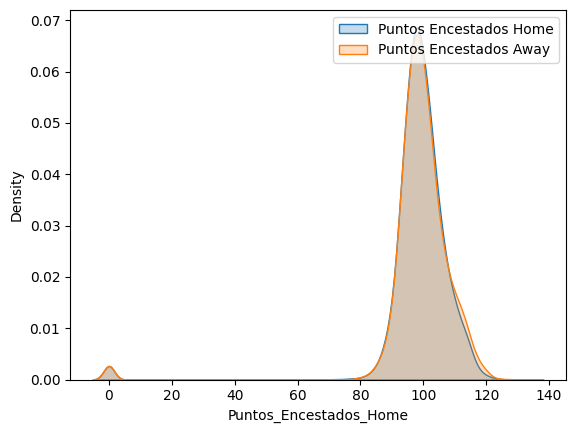

In [21]:
columnas = ['Puntos Encestados Home','Puntos Encestados Away']
for i, col in enumerate(puntos_encestados.columns):
    sns.kdeplot(puntos_encestados[col], fill=True, label=columnas[i])
plt.legend()
plt.show()

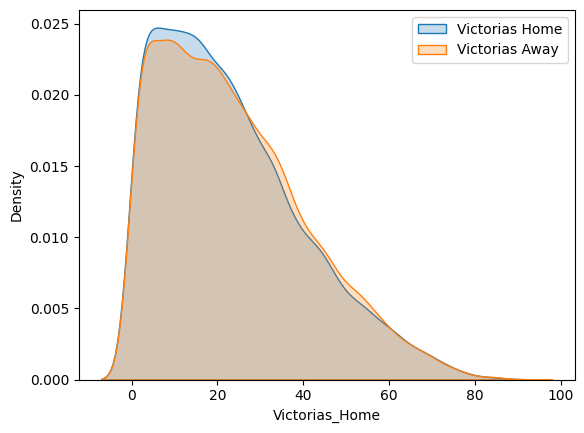

In [22]:
columnas = ['Victorias Home','Victorias Away']
for i, col in enumerate(victorias.columns):
    sns.kdeplot(victorias[col], fill=True, label=columnas[i])
plt.legend()
plt.show()

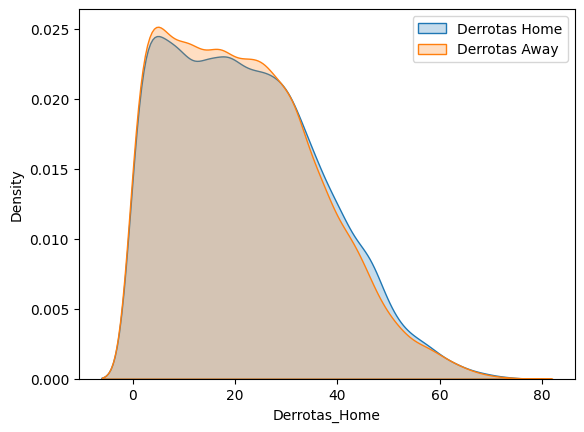

In [23]:
columnas = ['Derrotas Home','Derrotas Away']
for i, col in enumerate(derrotas.columns):
    sns.kdeplot(derrotas[col], fill=True, label=columnas[i])
plt.legend()
plt.show()

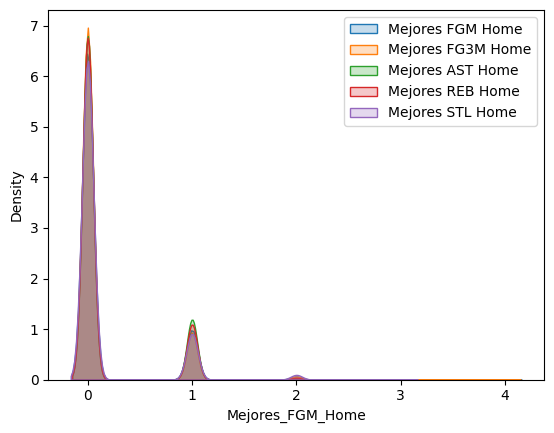

In [24]:
columnas = ['Mejores FGM Home','Mejores FG3M Home','Mejores AST Home','Mejores REB Home','Mejores STL Home']
for i, col in enumerate(mejores_jugadores_home.columns):
    sns.kdeplot(mejores_jugadores_home[col], fill=True, label=columnas[i])
plt.legend()
plt.show()

In [25]:
scale = MinMaxScaler().fit(features)
features_normalized = scale.transform(features)
features_normalized_dataframe = pd.DataFrame(features_normalized, columns=columnas_features)
features_normalized_dataframe.head()

,Basket_Average_Home,Basket_Average_Away,Dif_Home,Dif_Away,Porcentage_Home,Porcentage_Away,Puntos_Encestados_Home,Puntos_Encestados_Away,Victorias_Home,Derrotas_Home,Victorias_Away,Derrotas_Away,Basket_Average_Ultimos_5_Home,Basket_Average_Ultimos_5_Away
0,0.529412,0.43956,0.529412,0.43956,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.529412,0.43956
1,0.529412,0.43956,0.529412,0.43956,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.529412,0.43956
2,0.529412,0.43956,0.529412,0.43956,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.529412,0.43956
3,0.764706,0.43956,0.764706,0.43956,1.0,0.0,0.778626,0.0,0.010989,0.000000,0.0,0.0,0.764706,0.43956
4,0.376471,0.43956,0.376471,0.43956,0.0,0.0,0.633588,0.0,0.000000,0.013514,0.0,0.0,0.376471,0.43956


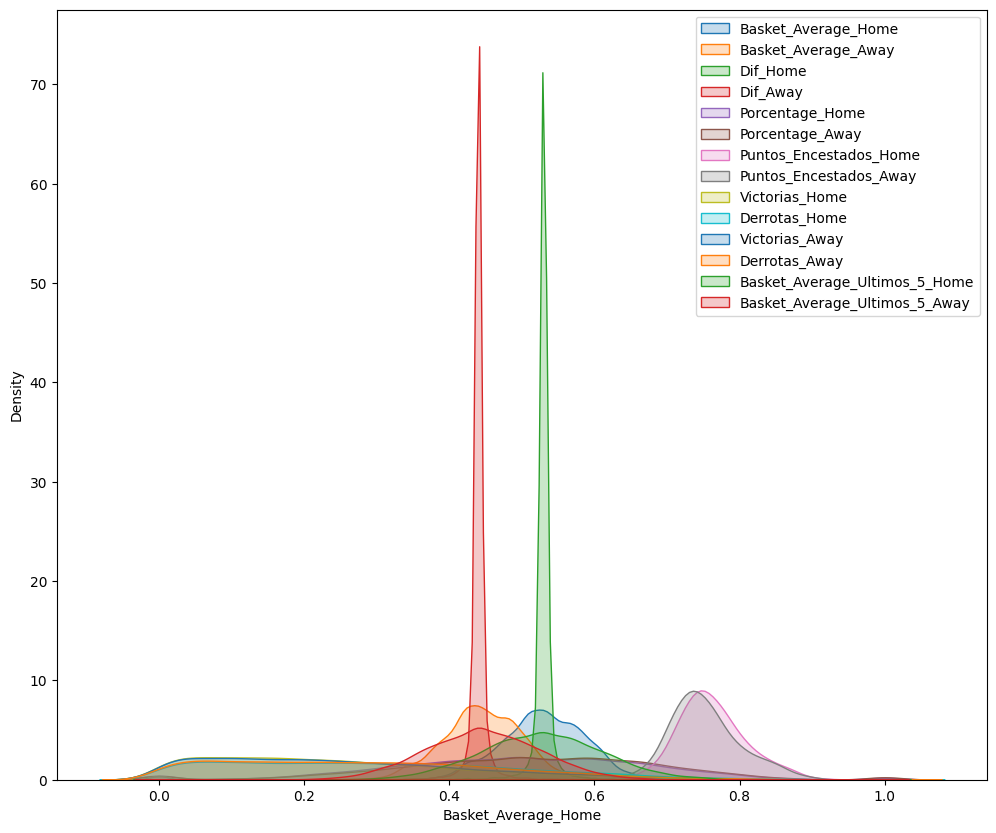

In [26]:
plt.figure(figsize=(12,10))
for i, col in enumerate(features_normalized_dataframe.columns):
    sns.kdeplot(features_normalized_dataframe[col], fill=True, label=columnas_features[i])
plt.legend()
plt.show()

In [27]:
onehot_encoder = OneHotEncoder(sparse_output=False)
equipos_encoded = onehot_encoder.fit_transform(np.array([equipos_locales, equipos_visitantes]).T)
equipos_encoded.shape

(20100, 60)

In [28]:
predictores = np.concatenate((features_normalized_dataframe[columnas_features].values, equipos_encoded), axis=1)
predictores.shape

(20100, 74)

In [29]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='macro'),  # 'macro' for the between classes average
    'precision': make_scorer(precision_score, average='macro')  # 'macro' for the between classes average
}

In [30]:
#ESTE BLOQUE VALE PARA CUANDO SE HACE EL ANALISIS DE ESTADISTICAS MAS IMPORTANTES SE PONGAN BIEN LOS NOMBRES

original_feature_names = list(features_normalized_dataframe[columnas_features].columns)

# Nombres de las características categóricas
categorical_feature_names = ['local_team', 'visitor_team']

# Combina ambas listas
all_feature_names = original_feature_names + categorical_feature_names
equipos_locales = np.array(equipos_locales)
equipos_visitantes = np.array(equipos_visitantes)

# Concatenar las características numéricas con las categóricas
predictores_analisis = np.concatenate((features_normalized_dataframe[columnas_features].values, 
                              equipos_locales.reshape(-1, 1), 
                              equipos_visitantes.reshape(-1, 1)), axis=1)

In [31]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)  
selector = SelectFromModel(estimator=clf, threshold='mean') # puedes ajustar el umbral según lo desees
selector.fit(predictores_analisis, target)
predictores_selected = selector.transform(predictores_analisis)
selected_features_mask = selector.get_support()
selected_feature_names = np.array(all_feature_names)[selected_features_mask]

# Mostrar las características seleccionadas
selected_feature_names

array(['Basket_Average_Home', 'Basket_Average_Away',
       'Puntos_Encestados_Home', 'Puntos_Encestados_Away'], dtype='<U29')

## - Entrenamiento del modelo

### División del dataset en entrenamiento y evaluación del modelo

In [32]:
features_train, features_test, target_train, target_test = train_test_split( predictores, target, test_size=0.2, random_state=42)
print ('Train set:', features_train.shape,  target_train.shape)
print ('Test set:', features_test.shape,  target_test.shape)

Train set: (16080, 74) (16080,)
Test set: (4020, 74) (4020,)


### Definición y construcción del modelo

In [209]:
def get_modelo_regresion():
    model = LogisticRegression(max_iter=80, solver='liblinear', C=10, penalty='l1')
    return model

def get_modelo_random_forest():
    model = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=6, criterion='log_loss')
    return model

def get_modelo_svc():
    model = SVC(kernel='linear', C=0.5, gamma='scale', probability=True)
    return model

def get_modelo_gbm(): ##mejores resultados pero tarda en entrenar
    model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_depth=6, random_state=42)  
    return model

def get_modelo_decision_tree():
    model = DecisionTreeClassifier(criterion="log_loss",max_depth=13, random_state=42) 
    return model

def get_modelo_knn(): ##mejor recall en empates
    model = KNeighborsClassifier(n_neighbors=47, metric="minkowski", weights='uniform')
    return model

def get_modelo_naive_bayes():
    #model = GaussianNB()
    model = MultinomialNB()
    return model

def get_modelo_regresion_deep(features: pd.DataFrame) -> Sequential:
    numero_predictores = features.shape[1]
    #Crear el modelo
    model = Sequential()
    model.add(Dense(80, activation='relu', input_shape=(numero_predictores,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    #Compilar modelo
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])    
    return model

model = get_modelo_regresion()

### Entrenamiento del modelo

In [210]:
model.fit(features_train, target_train)
#iteraciones=4
#historial_entrenamiento=model.fit(features_train, target_train, validation_data=(features_test,target_test), epochs=iteraciones, verbose=1)

LogisticRegression(C=10, max_iter=80, penalty='l1', solver='liblinear')

In [211]:
#ESTO VALE PARA HACER CROSS VALIDATION PERO NO ENTRENA EL MODELO
#results = cross_validate(model, predictores_selected, target, cv=kf, scoring=scoring, return_train_score=False)

## -Evaluación del modelo

### Evolución del modelo

In [212]:
target_pred = model.predict(features_test)
accuracy = accuracy_score(target_test, target_pred)
recal = recall_score(target_test, target_pred, average=None)
recal_total = recall_score(target_test, target_pred, average='macro')
precision = precision_score(target_test, target_pred, average=None)
precision_total = precision_score(target_test, target_pred, average='macro')
conf_matrix = confusion_matrix(target_test, target_pred)
print("Accuracy del modelo:", accuracy)
print("Recall del modelo:", recal)
print("Recall del modelo:", recal_total)
print("Precision del modelo:", precision)
print("Precision del modelo:", precision_total)
print("Matriz de Confusión:")
print(conf_matrix)

Accuracy del modelo: 0.6604477611940298
Recall del modelo: [0.66231811 0.65860878]
Recall del modelo: 0.6604634474236541
Precision del modelo: [0.65606362 0.66484064]
Precision del modelo: 0.6604521278702289
Matriz de Confusión:
[[1320  673]
 [ 692 1335]]


In [213]:
# print("Accuracy por fold:", results['test_accuracy'])
# print("Recall por fold:", results['test_recall'])
# print("Precision por fold:", results['test_precision'])

# print("\nAccuracy medio:", results['test_accuracy'].mean())
# print("Recall medio:", results['test_recall'].mean())
# print("Precision medio:", results['test_precision'].mean())

# print("\nDesviación estándar de Accuracy:", results['test_accuracy'].std())
# print("Desviación estándar de Recall:", results['test_recall'].std())
# print("Desviación estándar de Precision:", results['test_precision'].std())

## - Predicción real de un partido

In [214]:
HT=1610612743
AT=1610612744
diferencias_home = dict_ultimas_diferencias_cada_equipo[HT]   
diferencias_away = dict_ultimas_diferencias_cada_equipo[AT] 
basket_average_home = dict_ultimo_basket_average_equipo[HT]
basket_average_away = dict_ultimo_basket_average_equipo[AT]
winning_percentage_home = dict_ultimos_porcentages_cada_equipo[HT]
winning_percetange_away = dict_ultimos_porcentages_cada_equipo[AT]
puntos_encestados_home = dict_ultimos_puntos_marcados_cada_equipo[HT]
puntos_encestados_away = dict_ultimos_puntos_marcados_cada_equipo[AT]
victories_home = dict_ultimos_resultados_cada_equipo[HT][0]
defeats_home = dict_ultimos_resultados_cada_equipo[HT][1]
victories_away = dict_ultimos_resultados_cada_equipo[AT][0]
defeats_away = dict_ultimos_resultados_cada_equipo[AT][1]
basket_average_5_home = dict_ultimo_basket_average_ultimos_5_equipo[HT]
basket_average_5_away = dict_ultimo_basket_average_ultimos_5_equipo[AT]

### Normalizar los predictores teniendo en cuenta los predictores usados para el entrenamiento del modelo

In [215]:
local = [HT,]
visitante = [AT,]
locales_encoded = label_encoder.transform(local)
visitantes_encoded = label_encoder.transform(visitante)

equipos_encoded = onehot_encoder.transform(np.array([locales_encoded, visitantes_encoded]).T)
equipos_encoded.shape

(1, 60)

In [216]:
#algo le pasa a los preictores que da lugar a predicciones muy bestias

datos_partido = np.array([
    basket_average_home, basket_average_away,
    diferencias_home, diferencias_away,
    winning_percentage_home, winning_percetange_away,
    puntos_encestados_home, puntos_encestados_away,
    victories_home, defeats_home,
    victories_away, defeats_away,
    basket_average_5_home, basket_average_5_away
]).reshape(1, -1)
datos_partido = scale.transform(datos_partido)
datos_partido

c:\Users\User\OneDrive\Escritorio\TFG\Cosas_TFG\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.54117647, 0.43811452, 0.53391003, 0.43068951, 0.62857143,
        0.47368421, 0.87873501, 0.87218045, 0.24175824, 0.17567568,
        0.1978022 , 0.26315789, 0.57176471, 0.28571429]])

In [217]:
predictores = np.concatenate((datos_partido, equipos_encoded), axis=1)
predictores.shape

(1, 74)

### Predicción del valor objetivo

In [218]:
pred = model.predict_proba(predictores)
pred

array([[0.46731958, 0.53268042]])

### Conversión del número devuelto
Puede que el valor de las probabilidades devuelto por el modelo sea muy pequeño así que se opera para ser un número más manejable

In [219]:
def convertir_numbero(prediccion: list) -> list:
    prediccion_valores=[]
    for i in range(len(prediccion[0])):
      pred_number=float(format(prediccion[0][i], '.3f'))
      prediccion_valores.append(pred_number)

    return (prediccion_valores)
  
pred_number_probabilities=convertir_numbero(pred)

### Obtención del resultado predicho en base a las probabilidades predichas por el modelo

In [220]:
def get_ganador_prediccion(ganador: list) -> str:
    y=ganador.index(max(ganador))
    if y==0:
        pred_winner='Away'
    else:
        pred_winner='Home'
    return pred_winner

ganador_predicho=get_ganador_prediccion(pred_number_probabilities)

### Resultado Final

In [221]:
print('El ganador predicho es: ',ganador_predicho)

El ganador predicho es:  Home


### Visualización de las probabilidades en una gráfica

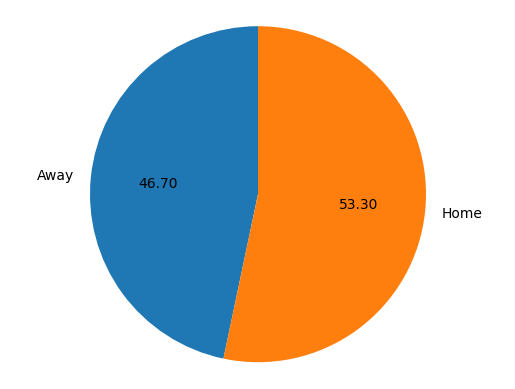

In [222]:
etiquetas = 'Away', 'Home'
figureObject, axesObject = plt.subplots()
axesObject.pie(pred_number_probabilities, labels=etiquetas, autopct='%1.2f', startangle=90)
axesObject.axis('equal') # Aspect ratio equal means pie is a circle
plt.show()